In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
pd.options.mode.chained_assignment = None  # remove pd indexing warning

In [3]:
df = pd.read_excel('Canada.xlsx',
                   sheet_name='Canada by Citizenship',
                   skiprows = range(20),
                   skipfooter = 2)

In [4]:
columns = ['OdName']
for year in range(1980, 2014):
    columns.append(year)
df = df.filter(columns)

In [5]:
'''
dictionary of populations for each country we will be use, using 2004 data (in millions)

The 4 archetypes:
C1 = resource-rich, dense
C2 = resource-rich, sparse
C3 = resource-poor, dense
C4 = resource-poor, sparse
'''
populations = {
    "Singapore": ('C1', 4.167),
    "Netherlands": ('C1', 16.26),
    "United Kingdom": ('C1', 59.79),
    "Australia": ('C2', 20.13),
    "Sweden": ('C2', 8.976),
    "United States": ('C2', 292.8),
    "Lebanon": ('C3', 4.569),
    "India": ('C3', 1131),
    "Philippines": ('C3', 84.71),
    "Libya": ('C4', 5.71),
    "Bolivia": ('C4', 9.069),
    "Iran": ('C4', 68.95)
}

In [6]:
'''
Plan: 

Use supervised learning to predict immigration levels into Atlantis

Have 2 developed countries: Atlantis & 
Other 3 countries are developing

We need a system using our current interfaces to build a turn-based game

Need a way to implement part 1 into an instance of a player, and also
include a game manager.
'''

'\nPlan: \n\nUse supervised learning to predict immigration levels into Atlantis\n\nHave 2 developed countries: Atlantis & \nOther 3 countries are developing\n\nWe need a system using our current interfaces to build a turn-based game\n\nNeed a way to implement part 1 into an instance of a player, and also\ninclude a game manager.\n'

In [7]:
countries_df = pd.DataFrame()

In [8]:
for country in populations:
    archetype = populations[country][0]
    population = populations[country][1]
    
    country_df = df.loc[df["OdName"] == country]
    country_df['Arch'] = archetype
    for year in range(1980, 2014):
        country_df[year] /= population
        
    countries_df = countries_df.append(country_df)

In [9]:
countries = populations.keys()
df_collection = {}

In [10]:
for country in countries:
    country_df = pd.DataFrame(columns=['Year', 'Immigration'])
    for year in range(1980, 2014):
        year_df = pd.DataFrame({
            "Year": [year],
            "Immigration": countries_df[countries_df["OdName"] == country][year]
        })
        country_df = country_df.append(year_df, ignore_index = True)
    df_collection[country] = country_df

In [11]:
models = {}

Country:  Singapore
R2 Score: 
0.38634827222603085


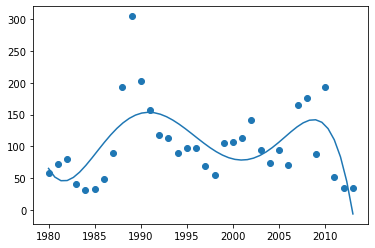

Country:  Netherlands
R2 Score: 
0.7748507862184549


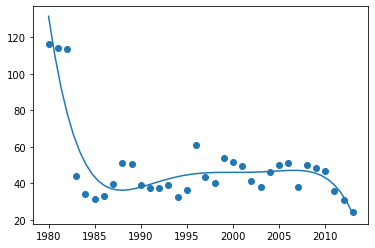

Country:  United Kingdom
R2 Score: 
0.8162650246675405


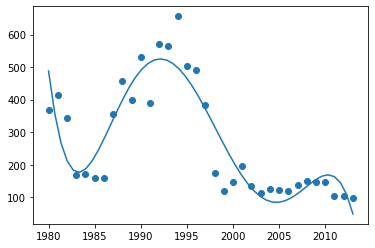

Country:  Australia
R2 Score: 
0.8130094732033053


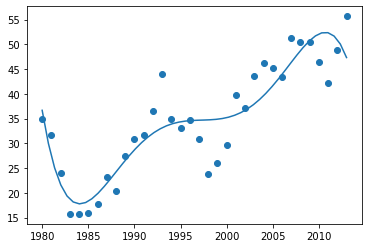

Country:  Sweden
R2 Score: 
0.6275459380770312


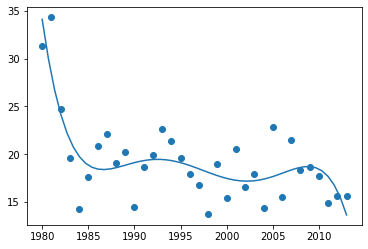

Country:  United States
R2 Score: 
0.7488103451266153


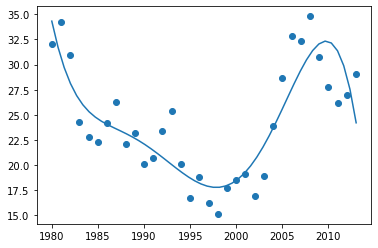

Country:  Lebanon
R2 Score: 
0.46981802559426944


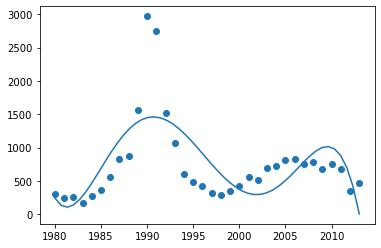

Country:  India
R2 Score: 
0.920355915680479


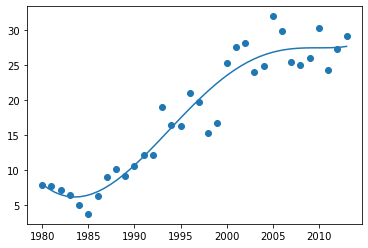

Country:  Philippines
R2 Score: 
0.9331068269915661


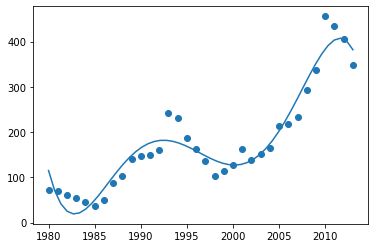

Country:  Libya
R2 Score: 
0.9183362007984135


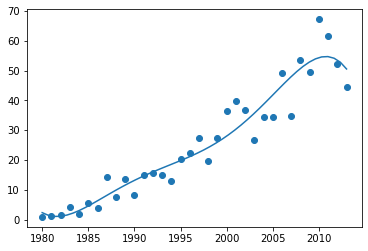

Country:  Bolivia
R2 Score: 
0.47735601215933965


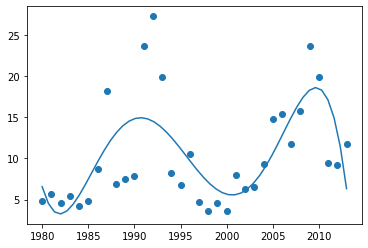

Country:  Iran
R2 Score: 
0.8406095027711321


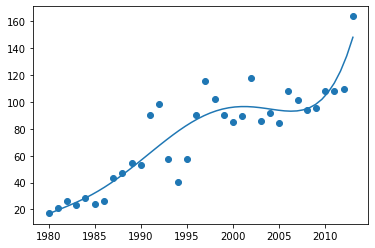

In [12]:
for country in df_collection:
    country_df = df_collection[country]
    x = country_df["Year"].astype("int")
    y = country_df["Immigration"].astype("float")
    model = np.poly1d(np.polyfit(x, y, 5))
    line = np.linspace(1980, 2013)
    print("Country: ", country)
    print("R2 Score: ")
    print(r2_score(y, model(x)))
    plt.scatter(x,y)
    plt.plot(line, model(line))
    plt.show()
    models[country] = model

In [13]:
# Includes predictions for years beyond 2013
for year in range(1980, 2030):
    print("Year: ", year)
    for country in models:  
        print(country, ": ", models[country](year))

Year:  1980
Singapore :  65.341796875
Netherlands :  131.64208984375
United Kingdom :  488.0546875
Australia :  36.68212890625
Sweden :  34.09814453125
United States :  34.3153076171875
Lebanon :  242.625
India :  8.010025024414062
Philippines :  114.92578125
Libya :  2.3095703125
Bolivia :  6.563232421875
Iran :  16.678955078125
Year:  1981
Singapore :  48.2109375
Netherlands :  101.43017578125
United Kingdom :  309.3515625
Australia :  27.40869140625
Sweden :  28.31640625
United States :  30.68017578125
Lebanon :  111.8125
India :  7.0821990966796875
Philippines :  54.37890625
Libya :  1.1712646484375
Bolivia :  3.92431640625
Iran :  19.53515625
Year:  1982
Singapore :  46.2421875
Netherlands :  78.7958984375
United Kingdom :  212.8984375
Australia :  21.6845703125
Sweden :  24.2344970703125
United States :  28.1646728515625
Lebanon :  138.90625
India :  6.4793243408203125
Philippines :  25.3125
Libya :  1.092041015625
Bolivia :  3.260986328125
Iran :  22.33056640625
Year:  1983
Sing

Netherlands :  -8.44873046875
United Kingdom :  -314.8359375
Australia :  30.2998046875
Sweden :  4.345458984375
United States :  6.689453125
Lebanon :  -2169.0625
India :  28.494644165039062
Philippines :  219.98828125
Libya :  36.8150634765625
Bolivia :  -20.691162109375
Iran :  209.087158203125
Year:  2016
Singapore :  -464.046875
Netherlands :  -32.96923828125
United Kingdom :  -642.125
Australia :  15.088134765625
Sweden :  -3.198974609375
United States :  -7.520263671875
Lebanon :  -3964.90625
India :  29.2811279296875
Philippines :  59.6640625
Libya :  24.926513671875
Bolivia :  -42.98779296875
Iran :  253.163818359375
Year:  2017
Singapore :  -729.783203125
Netherlands :  -64.9814453125
United Kingdom :  -1100.25
Australia :  -5.994384765625
Sweden :  -13.2630615234375
United States :  -26.34375
Lebanon :  -6373.5625
India :  30.4290771484375
Philippines :  -171.0234375
Libya :  8.794921875
Bolivia :  -72.8427734375
Iran :  308.411376953125
Year:  2018
Singapore :  -1070.998046